# Reinforcement Learning with Human Feedback (RLHF)

RLHF is a new paradigm in reinforcement learning where the agent learns from human feedback. The feedback can be in the form of rewards, demonstrations, or corrections. The agent can be a human, a machine, or a combination of both. The goal is to learn a policy that maximizes the reward while minimizing the feedback. It is the way that ChatGPT was developed.

The general workflow of LLM training:
1. Model PreTraining
2. Model Supervised Fine-Tuning (SFT) * Converting next token prediction to chat response
3. Model Alignment (PPO/DPO) * Alignment of models to not swear, be polite, etc.

References:

[Reinforcement Learning from Human Feedback explained with math derivations and the PyTorch code](https://www.youtube.com/watch?v=qGyFrqc34yc&list=WL&index=8&ab_channel=UmarJamil)

[]()
[]()
[]()
[]()
[]()
[]()

# What is the connection between RLHF and LLMs?

Agent - Language Model
Policy - Language Model (Probabilistic model of the environment)
Environment - Chat / Vocabulary
State - Prompt
Action - Next token prediction
Reward - Human feedback for good/bad responses

Example:
```
The action sampled from the policy given the current state.
at ~ pi(*|st)
```

We as humans are not good at agreement, but we're really good at comparison. We can say if something is better or worse, but we can't say if something is good or bad. We can't say if something is 0.5 or 0.6, but we can say if something is better or worse.

## So how do we train a model with human feedback?

We prompt a model with varying temperatures and create a dataset of responses. Then we ask humans to compare the responses and pick the better one. At this point we can build a neural network to model the human feedback. This is the reward function.

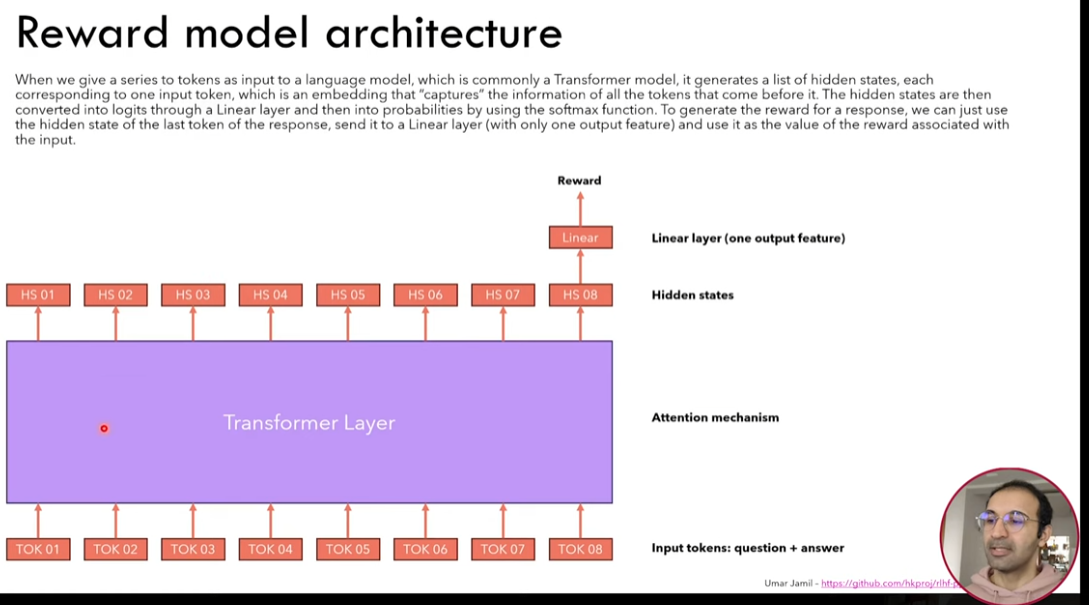

What we do is take a pretrained model:
Feed the question + answer into the transformer

Pop-out the hidden states

Take the last linear state, project it to the vocabulary size, and get the logits

## What is the Reward model Loss Function?

```
L = -log(sigmoid(r(x, yw) - r(x, yl)))
```

Where:
- r(x, y) is the reward model
- yw is the better response
- yl is the worse response
- x is the prompt

Think about it...
If the reward difference is positive, it means that the reward for the good response is higher than the reward for the bad response. So the loss will be low.

```
Example:
reward value range = [0, 1]
r(x, yw) = 0.8
r(x, yl) = 0.2

L = -log(sigmoid(0.8 - 0.2)) = -log(sigmoid(0.6)) = -log(0.645) = 0.438
```

If the reward difference is negative, it means that the reward for the bad response is higher than the reward for the good response. So the loss will be high.

```
Example:
reward value range = [0, 1]
r(x, yw) = 0.2
r(x, yl) = 0.8

L = -log(sigmoid(0.2 - 0.8)) = -log(sigmoid(-0.6)) = -log(0.355) = 1.04
```

## Let's talk about trajectories in Reinforcement Learning

A trajectory is a sequence of states, actions, and rewards. It is the path that the agent takes through the environment. The goal of reinforcement learning is to find the optimal policy that maximizes the expected reward. This is done by learning from the trajectories generated by the agent.

In other words, the trajectory is the optimal path for a mouse to get the cheese.
$$
\pi^* = \arg\max_{\pi} (J(\pi))
$$

Where:
- \( \pi \) is the policy
- \( J(\pi) \) is the expected reward
  - \( J(\pi) = \int P(t|\pi) \cdot R(t) \, dt = E[R(t)] \)
  - \( t = (s_0, a_0, r_0, s_1, a_1, r_1, \ldots, s_n, a_n, r_n) \)
  - \( s(t+1) \sim P(*|s_t, a_t) \)
  - \( P(t|\pi) = p_0 \cdot s_0 + p_1 \cdot s_1 + \ldots + p_n \cdot s_n \)
  - \( R(t) = g_0 \cdot r_0 + g_1 \cdot r_1 + \ldots + g_n \cdot r_n \)
- \( \pi^* \) is the optimal policy

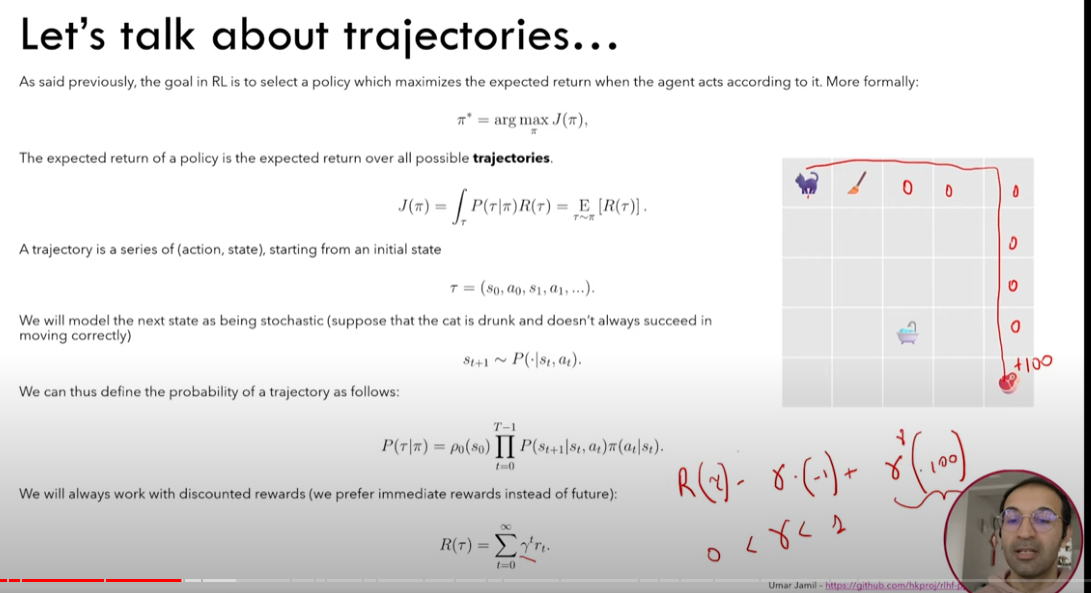

## Trajectories in Language Models
Similar to the basic RL Mouse and Cheese example, we can think of the trajectory in LLMs as the optimal path for the model to generate the best response to a given prompt. The goal is to learn a policy that maximizes the expected reward while minimizing the feedback.

We have a state (prompt), an action (next token prediction). The next token is appended to the input creating a new state. The process is repeated until the end of the response.

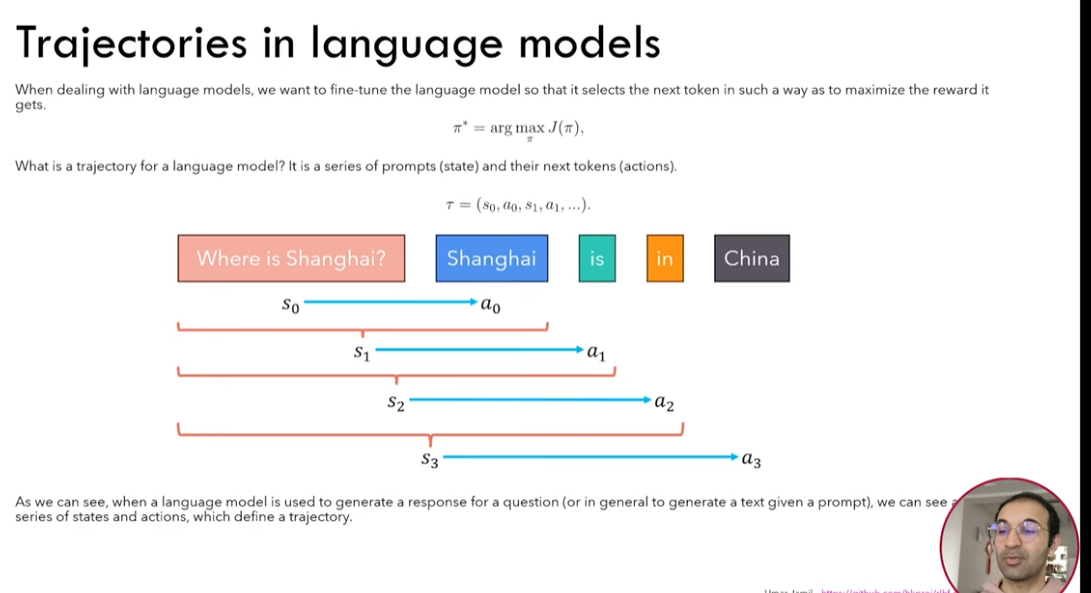


## Policy Gradient Optimization (PPO)

PPO is a reinforcement learning algorithm that is used to optimize the policy of an agent. It is based on the idea of policy gradients, which are used to update the policy in the direction that increases the expected reward. The goal of PPO is to find the policy that maximizes the expected reward while minimizing the feedback.

PPO is an objective function, so instead of gradient descent we use gradient ascent. The objective function is the expected reward, which is the sum of the rewards over the trajectory. The goal is to maximize the expected reward by updating the policy in the direction that increases the reward.

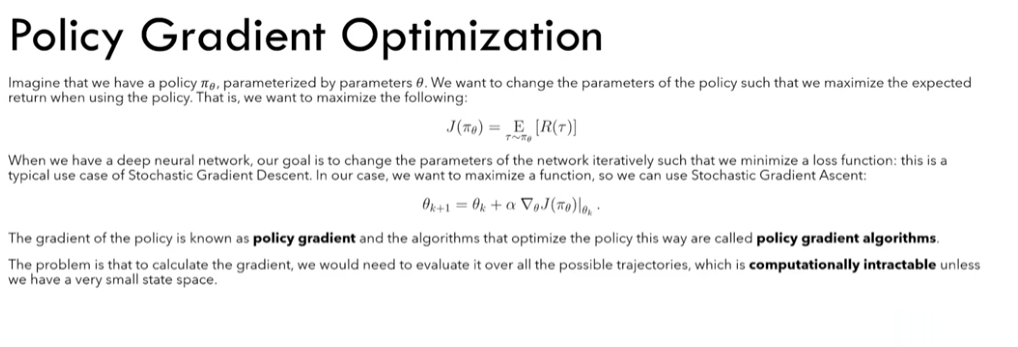

Derevation:

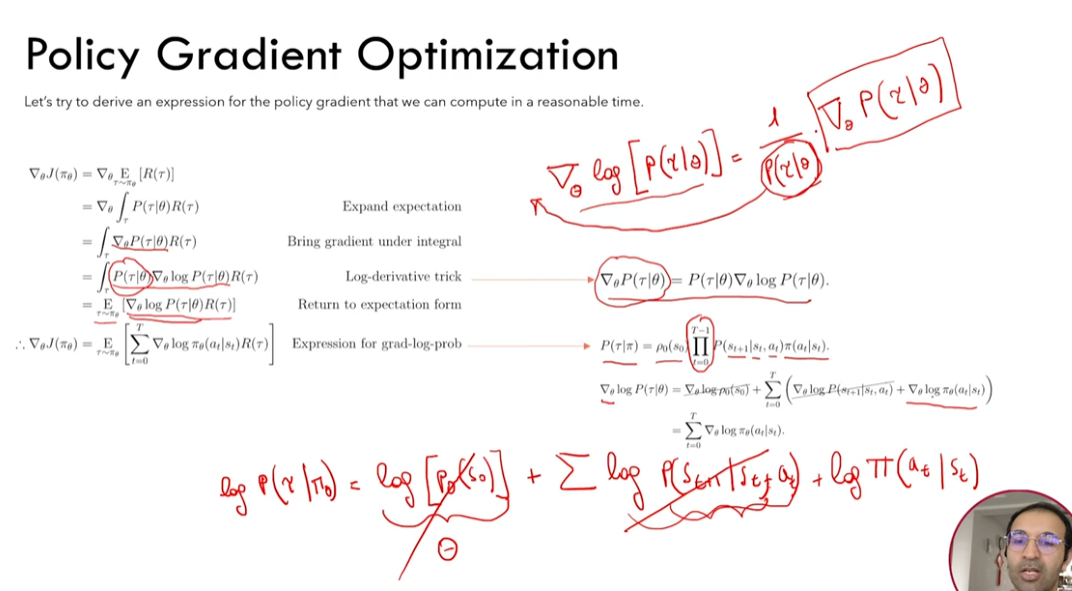

However this is intractable, so we can replace the expectation with a sample average.

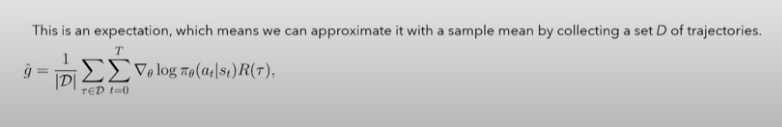

Recap:

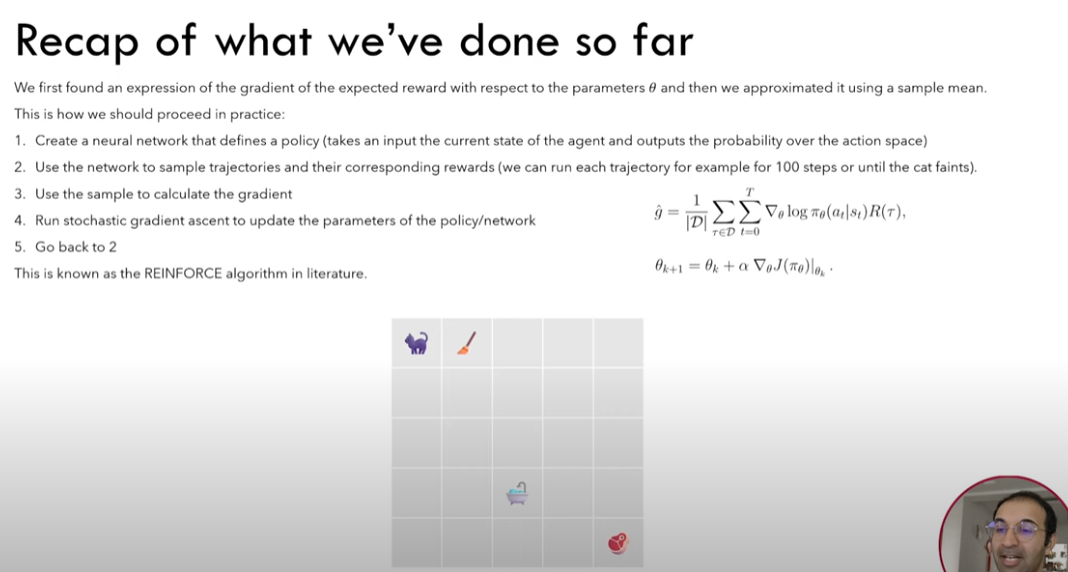

## Calculating log-probabilities from the autoregressive transformer

If the input is:
```
Where is Shanghai? Shanghai
```

We only care about the log-probability of the last token (Shanghai).

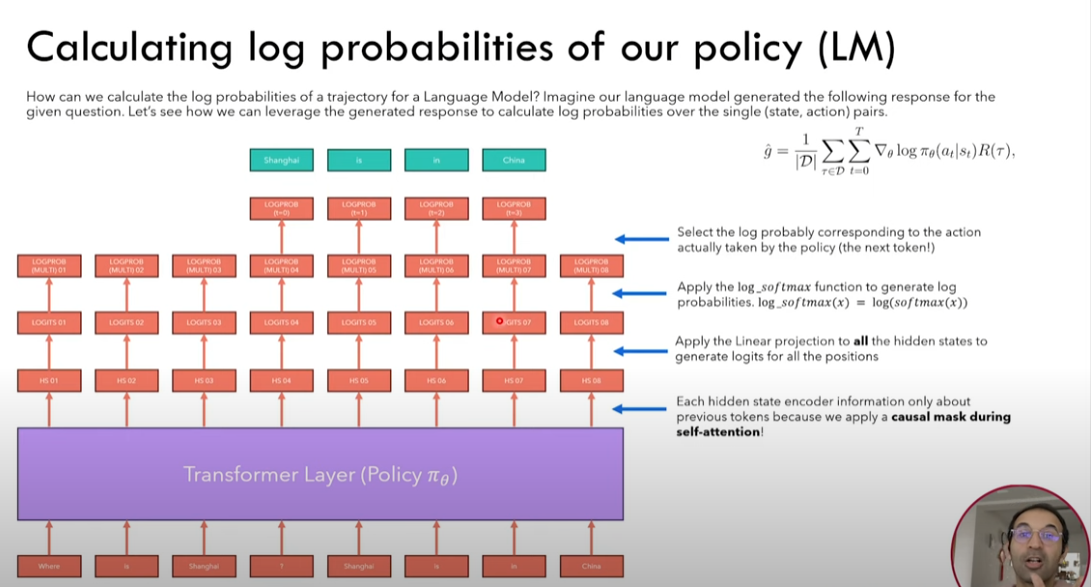